In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The data can be found at https://www.kaggle.com/akdagmelih/multiplelinear-regression-fish-weight-estimation/data

In [2]:
data = pd.read_csv("/content/Fish.csv")

In [3]:
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [4]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Preprocessing

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split




In [84]:
#Checking for missing values
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [85]:
y = data["Species"]
X = data.drop("Species", axis=1)

In [86]:
X

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [87]:
y

0      Bream
1      Bream
2      Bream
3      Bream
4      Bream
       ...  
154    Smelt
155    Smelt
156    Smelt
157    Smelt
158    Smelt
Name: Species, Length: 159, dtype: object

In [88]:
scalar = StandardScaler()

X = pd.DataFrame(scalar.fit_transform(X), columns = X.columns)
X

,Weight,Length1,Length2,Length3,Height,Width
0,-0.438072,-0.305789,-0.282303,-0.106020,0.596579,-0.236529
1,-0.303562,-0.225507,-0.198054,-0.002337,0.821261,-0.066579
2,-0.163448,-0.235542,-0.179332,-0.010977,0.797341,0.165793
3,-0.098995,0.005302,0.054694,0.196390,0.879771,0.022621
4,0.088759,0.025372,0.054694,0.239592,0.812835,0.426371
...,...,...,...,...,...,...
154,-1.082039,-1.479903,-1.517960,-1.540309,-1.610359,-1.799403
155,-1.078676,-1.459833,-1.499238,-1.531669,-1.530878,-1.873547
156,-1.082039,-1.419692,-1.443072,-1.505748,-1.566687,-1.881402
157,-1.061022,-1.309305,-1.321378,-1.384784,-1.427243,-1.398568


In [89]:
encoder = LabelEncoder()

y = encoder.fit_transform(y)
y_mappings = {index: label for index, label in enumerate(encoder.classes_)}

In [90]:
y, y_mappings

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5]),
 {0: 'Bream',
  1: 'Parkki',
  2: 'Perch',
  3: 'Pike',
  4: 'Roach',
  5: 'Smelt',
  6: 'Whitefish'})

## Training the data 

In [93]:
from sklearn.linear_model import LogisticRegression 
import tensorflow as tf
import matplotlib.pyplot as plt


In [94]:
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.8)

In [95]:
# to test the data
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

logistic_model.score(X_test, y_test)

0.84375

In [96]:
# Using tensorflow. 

#set random seed
tf.random.set_seed(42)

#Create the model 
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10, activation="relu"),
                               tf.keras.layers.Dense(10, activation="relu"),
                               tf.keras.layers.Dense(7, activation="softmax")
])

# Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy"
)

# Fit the model
history = model_1.fit(X_train, y_train, validation_split = 0.2, epochs=100, verbose=0)

In [97]:
model_1.evaluate(X_test, y_test)

1/1 [==============================] - 0s 241ms/step - loss: 0.8756 - accuracy: 0.7500


[0.8756096363067627, 0.75]

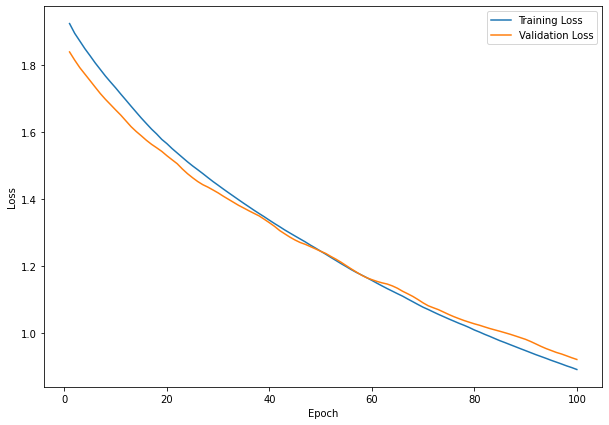

In [99]:
plt.figure(figsize=(10,7))

epochs_range = range(1, 101)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [57]:
model_1.evaluate(X_test, y_test)

1/1 [==============================] - 0s 353ms/step - loss: 0.5961 - accuracy: 0.8438


[0.5961343050003052, 0.84375]

In [100]:
# Increasing the number of hidden layers to improve the model

# Set random seed
tf.random.set_seed(42)

#Create the model 
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(10, activation="relu"),
                               tf.keras.layers.Dense(7, activation="softmax")
])

# Compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy"
)

# Fit the model
history = model_2.fit(X_train, y_train, validation_split = 0.2, epochs=100, verbose=0)

In [101]:
model_2.evaluate(X_test, y_test)

1/1 [==============================] - 0s 128ms/step - loss: 0.5341 - accuracy: 0.8750


[0.5340774655342102, 0.875]

Increasing the number of models vastly improves the accuracy of the model. We can try training for longer to see if the model becomes better

In [102]:
# Using tensorflow instead 

#create random set seed
tf.random.set_seed(42)

#Create the model 
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(10, activation="relu"),
                               tf.keras.layers.Dense(7, activation="softmax")
])

# Compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy"
)

epochs=500

# Fit the model
history = model_3.fit(X_train, y_train, validation_split = 0.2, epochs=epochs, verbose=0)

In [103]:
model_3.evaluate(X_test, y_test)

1/1 [==============================] - 0s 138ms/step - loss: 0.3508 - accuracy: 0.8438


[0.3507934808731079, 0.84375]

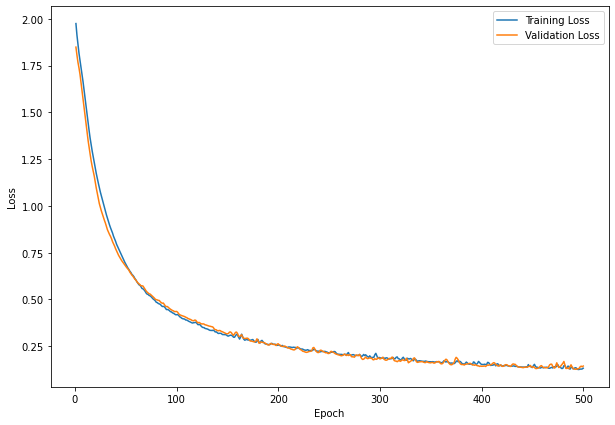

In [104]:
plt.figure(figsize=(10,7))

epochs_range = range(1, epochs+1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [108]:
# Validation loss started stabilizing at around 200 epochs, so we train there to see what the accuracy would be like

#create random set seed
tf.random.set_seed(42)

#Create the model 
model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(10, activation="relu"),
                               tf.keras.layers.Dense(7, activation="softmax")
])

# Compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy"
)

epochs=200

# Fit the model
history = model_4.fit(X_train, y_train, validation_split = 0.2, epochs=epochs, verbose=0)

In [107]:
model_4.evaluate(X_test, y_test)

1/1 [==============================] - 0s 129ms/step - loss: 0.4340 - accuracy: 0.8438


[0.43400055170059204, 0.84375]

The best model was the model 2 which had an accuracy of 0.875. The model should be able to be increased further and it will be looked at in following weeks.